In [24]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [25]:
%matplotlib inline

In [26]:
con_dist = pd.read_csv("data_sources/condom_dist_u.csv", 
                       index_col = "Community Area Name")
fgon = pd.read_csv("data_sources/gonorrhea_females.csv", 
                   index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [27]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area

con_dist_group.dropna(inplace = True) #get rid of all blank rows

con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, 
                      inplace = True) #rename # of condom centers column to be more clear




con_fgon_merged = con_dist_group.join(fgon) #merge condom distribution centers and female gonorrhea datasets

con_fgon_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, 
                       inplace = True)
con_fgon_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, 
                       inplace = True)
con_fgon_merged.rename(columns = {"Cases 2013 Female 15-44" : "Cases_2013_Female"}, 
                        inplace = True)
con_fgon_merged.rename(columns = {"Cases 2014 Female 15-44" : "Cases_2014_Female"}, 
                        inplace = True)

con_fgon_merged = con_fgon_merged[['Number_of_Condom_Centers',
                                    "Incidence_Rate_2013",
                                    "Cases_2013_Female",
                                    "Incidence_Rate_2014",
                                    "Cases_2014_Female"]]

con_fgon_merged['Cases_2014_Female'] = con_fgon_merged['Cases_2014_Female'].replace("<5", 0)
con_fgon_merged['Cases_2014_Female'] = con_fgon_merged['Cases_2014_Female'].fillna(0)

con_fgon_merged['Cases_2014_Female'] = con_fgon_merged['Cases_2014_Female'].astype(int)
#con_fgon_merged.head()


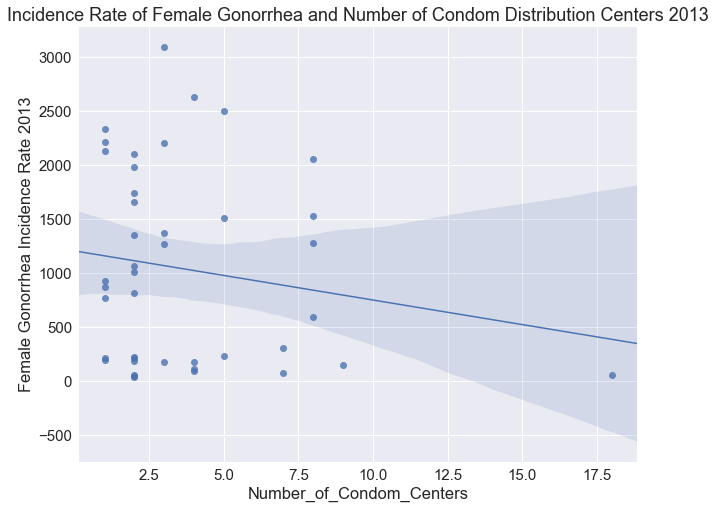

In [28]:

sns.set_context('notebook', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1, 
                    "figure.figsize" : (10, 8)
                   }
               ) 

graph15 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2013", data = con_fgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph15.set_ylabel("Female Gonorrhea Incidence Rate 2013") #fix y axis label
graph15.set_title("Incidence Rate of Female Gonorrhea and Number of Condom Distribution Centers 2013") # add label 

In [29]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.117
Date:                 Fri, 01 Dec 2017   Prob (F-statistic):              0.297
Time:                         22:00:22   Log-Likelihood:                -344.11
No. Observations:                   42   AIC:                             692.2
Df Residuals:                       40   BIC:                             695.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1203.3819    210.514      5.716      0.000     777.917    1628.847
Number_of_Condom_Centers   -45.4396     42.992     -1.057      0.297    -132.331      41.451
==============================================================================
Omnibus:                        5.488   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.250
Skew:                           0.481   Prob(JB):                        0.197
Kurtosis:                       2.035   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

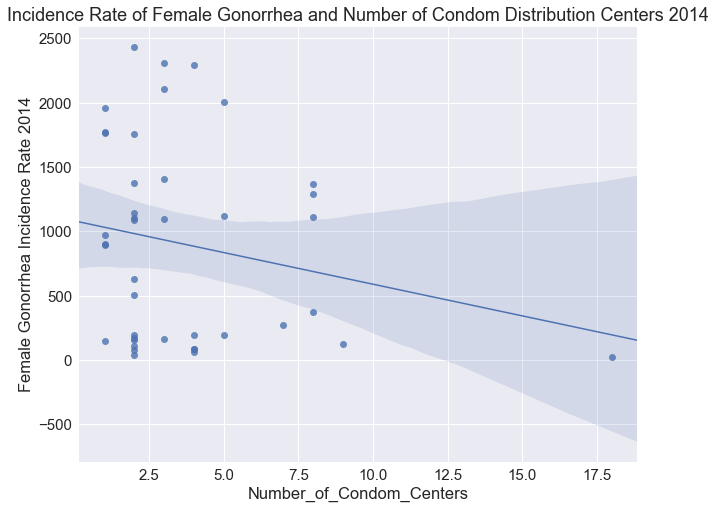

In [30]:


sns.set_context('notebook', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1, 
                    "figure.figsize" : (10, 8)
                   }
               ) 

graph16 = sns.regplot(x = "Number_of_Condom_Centers",
                      y = "Incidence_Rate_2014", 
                      data = con_fgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph16.set_ylabel("Female Gonorrhea Incidence Rate 2014") #fix y axis label
graph16.set_title("Incidence Rate of Female Gonorrhea and Number of Condom Distribution Centers 2014") # add label 

In [31]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     1.750
Date:                 Fri, 01 Dec 2017   Prob (F-statistic):              0.194
Time:                         22:00:22   Log-Likelihood:                -329.05
No. Observations:                   41   AIC:                             662.1
Df Residuals:                       39   BIC:                             665.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1081.0010    181.044      5.971      0.000     714.805    1447.197
Number_of_Condom_Centers   -49.1612     37.164     -1.323      0.194    -124.332      26.010
==============================================================================
Omnibus:                        6.249   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.075
Skew:                           0.420   Prob(JB):                        0.215
Kurtosis:                       1.953   Cond. No.                         7.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

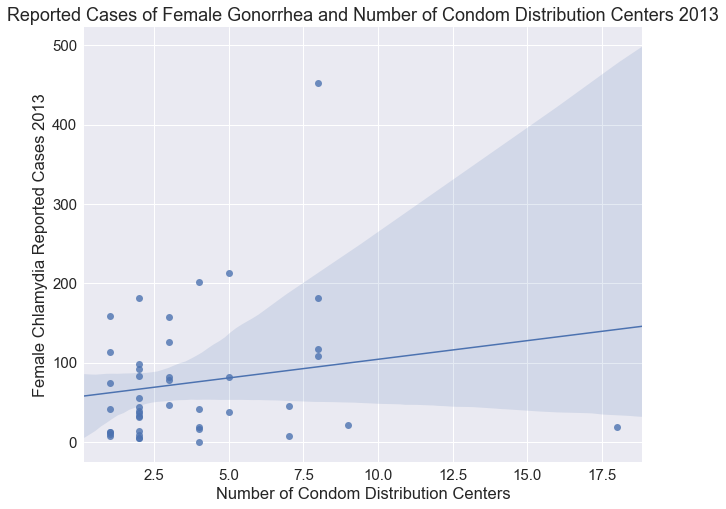

In [32]:
#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph17 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2013_Female", 
                      data = con_fgon_merged)

graph17.set_ylabel("Female Chlamydia Reported Cases 2013") #fix y axis label

graph17.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph17.set_title("Reported Cases of Female Gonorrhea and Number of Condom Distribution Centers 2013") # add label 

In [33]:
ols = smf.ols(formula = "Cases_2013_Female ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cases_2013_Female   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.391
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.245
Time:                        22:00:23   Log-Likelihood:                -250.02
No. Observations:                  43   AIC:                             504.0
Df Residuals:                      41   BIC:                             507.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   57.2630     19.420      2.949      0.005      18.044      96.482
Number_of_Condom_Centers     4.6962      3.981      1.180      0.245      -3.345      12.737
==============================================================================
Omnibus:                       36.116   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.956
Skew:                           2.115   Prob(JB):                     3.61e-24
Kurtosis:                       9.509   Cond. No.                         7.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

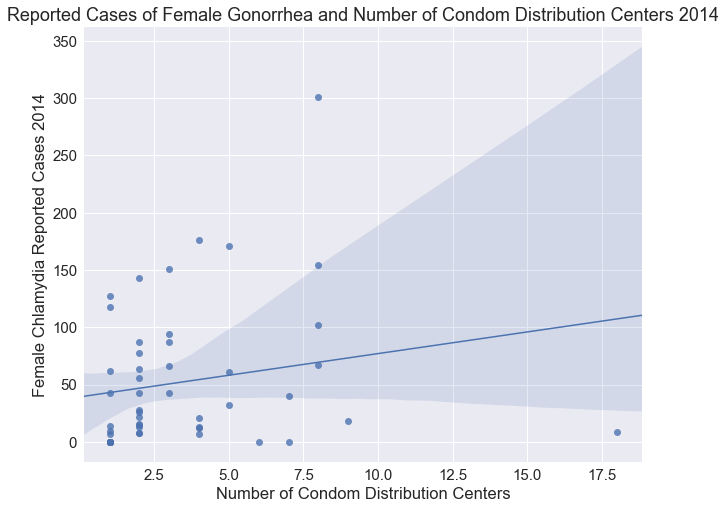

In [34]:
#create scatter plot to show relationship between # of condom sites and STI incidence rate
graph18 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Cases_2014_Female", 
                      data = con_fgon_merged)

graph18.set_ylabel("Female Chlamydia Reported Cases 2014") #fix y axis label

graph18.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph18.set_title("Reported Cases of Female Gonorrhea and Number of Condom Distribution Centers 2014") # add label 

In [35]:
ols = smf.ols(formula = "Cases_2014_Female ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cases_2014_Female   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.817
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.184
Time:                        22:00:23   Log-Likelihood:                -275.80
No. Observations:                  50   AIC:                             555.6
Df Residuals:                      48   BIC:                             559.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   39.3434     12.933      3.042      0.004      13.341      65.346
Number_of_Condom_Centers     3.7768      2.802      1.348      0.184      -1.857       9.411
==============================================================================
Omnibus:                       22.886   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.891
Skew:                           1.517   Prob(JB):                     2.65e-08
Kurtosis:                       5.746   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
graph15.figure.savefig('graphs/graph15.png')
graph16.figure.savefig('graphs/graph16.png')
graph17.figure.savefig('graphs/graph17.png')
graph18.figure.savefig('graphs/graph18.png')

In [37]:
graph15.figure.savefig('graphs/graph15.png')